# 1. Introduction 👋

<center><img src="https://images.unsplash.com/photo-1537724326059-2ea20251b9c8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1176&q=80" alt="Credit Card Picture" width="800" height="600"></center><br>

## Data Set Problems 🤔

👉 Credit scoring is a widely used risk management technique in the financial sector. It makes use of personal information and data provided by credit card applicants to estimate future bankruptcies and credit card loans. The bank has the authority to determine whether or not to provide the applicant a credit card. Credit scores can estimate the level of risk objectively. <br>
👉 **A machine learning model is required to predict if an application is a 'good' or 'bad' user in this dataset**. However, **there is no definition of 'good' or 'bad'**. Additionally, **the unbalanced data** problem is a significant issue in this project.

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Build ML model using PyCaret library.
*   Predicting approval of an applicant to get credit card.

---

## Data Sets Description 🧾
👉 There are 2 data sets will be used in this notebook:
1.   **Application record** (contains general information about applicant, such as applicant gender, DOB, education type, assets that applicant had, etc.)
2.   **Credit record** (contains applicant's loan payment records)
<br>

👉 There are **18 variables** in **application record** data set:
*   **12 categorical** variables,
*   **5 continuous** variables, and
*   **1** variable to accommodate the applicant ID.

👉 There are **3 variables** in **credit record** data set:
*   **1 categorical** variable,
*   **1 continuous** variable, and
*   **1** variable to accommodate the applicant ID.

👉 The **data dictionary** for both data sets can be seen **[here](https://www.kaggle.com/rikdifos/credit-card-approval-prediction/discussion/119320)**.

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*

## 1.1 What is PyCaret ❓
<br>
<center>
<img src="https://raw.githubusercontent.com/pycaret/pycaret/master/docs/images/logo.png" alt="PyCaret" width="50%" height="50%">
</center><br>

> PyCaret is an **open-source machine learning package written in low-code** that enables Data Scientists to **automate their machine learning processes**. It **reduces the model experimentation process**, allowing for the **achievement of specific outcomes with less code**.



## 1.2 Why using PyCaret ❔
> As more businesses shifted their focus to Machine Learning to address challenging issues, Data Scientists were expected to give results faster. This has increased the demand for automating important phases in Data Science projects so that Data Scientists may focus on the real problem at hand rather than writing hundreds of lines of code to identify the optimal model.

## 1.3 Quick Overview of PyCaret Classification Module 🔬
> The classification module in PyCaret (`pycaret.classification`) is **a supervised machine learning module that is used to classify items into binary groups using a variety of approaches and algorithms**. Classification issues are frequently used to forecast consumer default (yes or no), customer churn (whether a customer will leave or stay), and illness discovery (positive or negative).<br><br>
PyCaret's classification module may be used to solve problems involving **binary or multi-class classification**. It includes over **18 algorithms and 14 charts for analyzing model performance**. PyCaret's classification module supports a variety of sophisticated approaches, including hyper-parameter tweaking, assembly, and stacking.

#### .: 📖 Further information about PyCaret **[here](https://pycaret.org/)**.

# 2. Installing & Importing Libraries 📚
👉 Installing PyCaret and importing libraries that will be used in this notebook.

In [1]:
!pip install pycaret

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import pycaret

from pycaret.classification import *

warnings.filterwarnings('ignore') 

     |████████████████████████████████| 318 kB 243 kB/s            
     |████████████████████████████████| 24.2 MB 1.6 MB/s            
     |████████████████████████████████| 16.5 MB 683 kB/s             
     |████████████████████████████████| 25.9 MB 679 kB/s             
     |████████████████████████████████| 10.4 MB 29.2 MB/s            
     |████████████████████████████████| 114 kB 56.5 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 636 kB 52.1 MB/s            
     |████████████████████████████████| 167 kB 39.2 MB/s            
     |████████████████████████████████| 184 kB 33.9 MB/s            
     |████████████████████████████████| 1.0 MB 51.2 MB/s            
     |████████████████████████████████| 79 kB 5.1 MB/s             
     |████████████████████████████████| 58 kB 3.9 MB/s             
  Preparing metadata (setup.py) ... - done
  Created wheel for pyod: filename=pyod-0.9.8-py3-none-any.whl size=136773 sha256=

# 3. Reading Data Set 👓
👉 In this notebook, I will used the data set that has been cleaned and transformed using **Pentaho Data Integration (PDI)** or well known as **Kettle**.<br>
👉 ***More information for cleaned and transformed data set [here](https://github.com/caesarmario/etl-credit-card-dataset-using-pentaho)***.<br>

In [2]:
df = pd.read_csv("../input/application-data/Application_Data.csv")
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,39,1


In [3]:
print(df.shape)

(25128, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

👉 In the new data set, there are **25128 observations with 21 variables** with various data types, lengths, and formats.

# 4. PyCaret Implementation ⚙


## 4.1 Building Predict Model ⛏
👉To demonstrate the `predict_model()` method on unseen data, **a sample of 2513 observations from the imported dataset has been withheld for prediction purposes** (these 2513 records were not available during the machine learning experiment).

In [5]:
df_modeling = df.sample(frac=0.9, random_state=123)
df_unseen = df.drop(df_modeling.index)

df_modeling.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(df_modeling.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (22615, 21)
Unseen Data For Predictions: (2513, 21)


## 4.2 Setting Up PyCaret 🛠
👉 This section will set up the PyCaret by specify the target column and categorical variables. The train size will be set to **0.8 (80%)**. <br>
👉 This setup also try to **fix imbalance target**, since the number of applicant that approved are higher compare to rejected. <br> 
👉 For **full documentation** of PyCaret classification can be read **[here](https://pycaret.readthedocs.io/en/latest/api/classification.html)**.

In [6]:
stp = setup(data = df_modeling, 
            target = 'Status',
            train_size = 0.8,
            categorical_features = ['Applicant_Gender','Owned_Car','Owned_Realty',
                                    'Income_Type','Education_Type','Family_Status',
                                    'Housing_Type','Owned_Mobile_Phone','Owned_Work_Phone',
                                    'Owned_Phone','Owned_Email','Job_Title'], 
            ignore_features = ['Applicant_ID'],
            fix_imbalance = True,
            silent = True,
            session_id=123)

,Description,Value
0,session_id,123
1,Target,Status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22615, 21)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


## 4.3 Comparing Models 👀
👉 Now, using `compare_models()` function will compare the performance of several models on our train set.

In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9996,1.0000,0.9996,1.0000,0.9998,0.9578,0.9597,1.0250
lightgbm,Light Gradient Boosting Machine,0.9993,0.9998,0.9996,0.9997,0.9996,0.9191,0.9222,0.6070
ada,Ada Boost Classifier,0.9992,0.9988,0.9995,0.9997,0.9996,0.9092,0.9136,1.2090
gbc,Gradient Boosting Classifier,0.9990,0.9997,0.9992,0.9998,0.9995,0.9014,0.9049,4.9280
xgboost,Extreme Gradient Boosting,0.9990,0.9999,0.9994,0.9996,0.9995,0.8918,0.8957,8.2710
catboost,CatBoost Classifier,0.9989,0.9998,0.9992,0.9997,0.9994,0.8870,0.8920,17.4900
dt,Decision Tree Classifier,0.9973,0.8728,0.9984,0.9988,0.9986,0.7150,0.7227,0.3610
rf,Random Forest Classifier,0.9965,0.9969,0.9999,0.9965,0.9982,0.3540,0.4198,1.6010
et,Extra Trees Classifier,0.9964,0.9814,0.9998,0.9966,0.9982,0.3660,0.4380,1.3640
knn,K Neighbors Classifier,0.9914,0.7599,0.9937,0.9976,0.9957,0.3338,0.3508,0.4080


In [8]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


👉 From the findings above, it is obvious that **logistic regression** produces the best accuracy.<br>
👉 Next section will applying **logistic regression**.

## 4.4 Plot the Model 📈
### 4.4.1 Evaluate Model Function
👉 Using `evaluate_model()`, the logistic regression performance will be shown.

In [9]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 4.4.2 AUC Plot

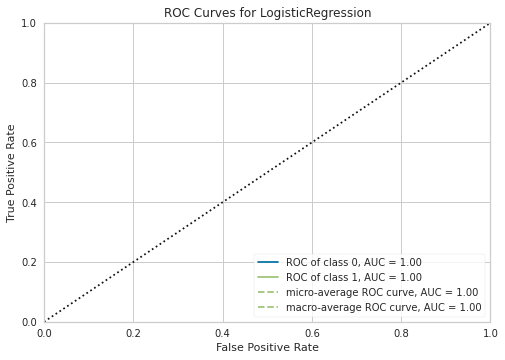

In [10]:
plot_model(best_model, plot = 'auc')

### 4.4.3 Precision-Recall Curve

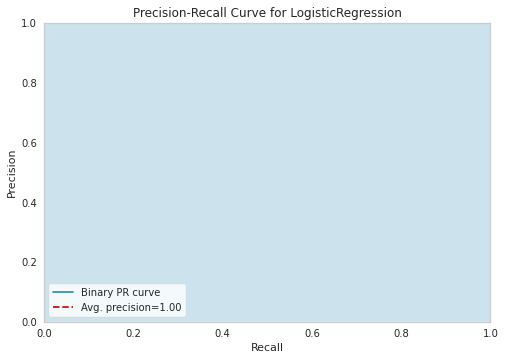

In [11]:
plot_model(best_model, plot = 'pr')

### 4.4.4 Feature Importance Plot

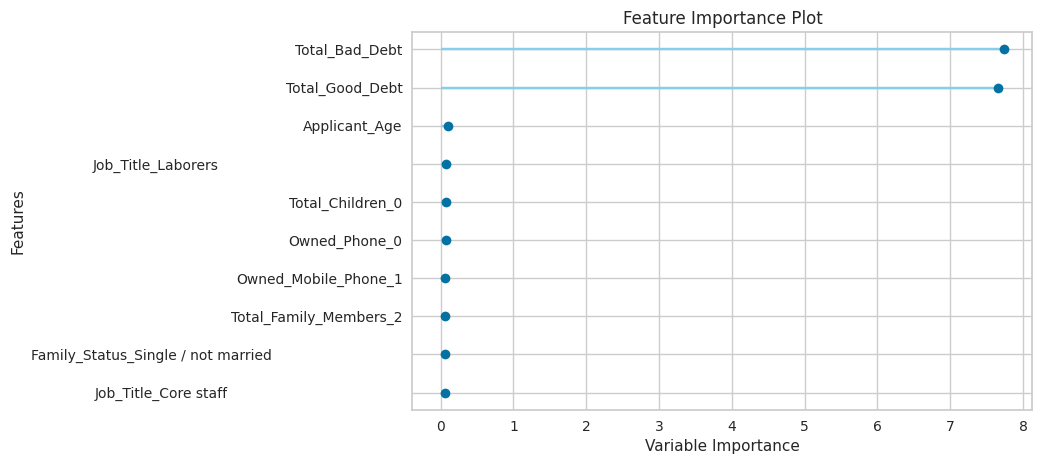

In [12]:
plot_model(best_model, plot='feature')

### 4.4.5 Confusion Matrix

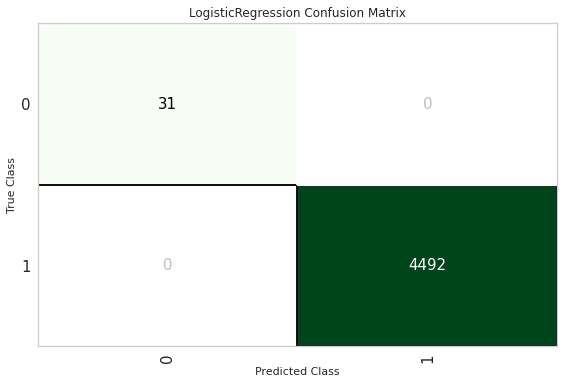

In [13]:
plot_model(best_model, plot = 'confusion_matrix')

## 4.5 Implementing Best Model 🔨
👉 This section will implement logistic regression since it has best accuracy.

In [14]:
logreg  = create_model('lr') 

👉 The `tune_model()` function will be used to determine the optimal settings and to produce a result based on those parameters.

In [15]:
tune_lr = tune_model(logreg)

👉 It can be seen that the accuracy improves a bit when using best parameters.

## 4.6 Predict on Test Sample ⚒

In [16]:
predict_model(tune_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


👉 The accuracy on test sample is **1.0** compared to **0.99** achieved on the `tune_lr`

## 4.7 Finalized Model for Deployment 🏁
👉 Finalizing the model is the final stage of the experiment. The method `finalize_model()` applies the model to the whole dataset, including the test/hold-out sample. This function is used to train the model on the whole dataset prior to it being deployed in production.

In [17]:
model_final = finalize_model(tune_lr)
print(model_final)

LogisticRegression(C=9.984, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## 4.8. Predictions on Unseen Data 🔮

In [18]:
predictions = predict_model(model_final, data=df_unseen)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Label,Score
0,5008826,F,1,0,0,130500,Working ...,Incomplete higher ...,Married ...,House / apartment ...,...,0,Accountants ...,2,30,4,7,23,1,1,1.0
1,5008832,F,0,1,0,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Laborers ...,2,28,5,2,33,1,1,1.0
2,5008841,M,0,1,1,405000,Commercial associate ...,Higher education ...,Married ...,House / apartment ...,...,0,Managers ...,3,33,6,0,5,1,1,1.0
3,5008858,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Laborers ...,4,44,9,0,11,1,1,1.0
4,5008862,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Laborers ...,4,44,9,0,3,1,1,1.0


👉 The columns **Label** and **Score** are appended to the data unseen set. The **label** represents the prediction, whereas the **score** is the probability of the prediction. Take note that predicted values are concatenated with the original dataset, and that all adjustments are performed automatically in the background.

# 5. Saving Model and Predictions 💾
👉 Additionally, PyCaret allows us to store the model as a `.pkl` file, which can be further deployed for serving in production pipelines. <br>
👉 This section will save the predictions in CSV file.

In [19]:
save_model(tune_lr,'PyCaret_CreditCard')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Applicant_Gender',
                                                             'Owned_Car',
                                                             'Owned_Realty',
                                                             'Income_Type',
                                                             'Education_Type',
                                                             'Family_Status',
                                                             'Housing_Type',
                                                             'Owned_Mobile_Phone',
                                                             'Owned_Work_Phone',
                                                             'Owned_Phone',
                                                             'Owned_Email',
                                                             'Job_Title'],
                

In [20]:
predictions.to_csv('predictions.csv', index=False)

# 6. References 🔗
👉 **Website**
*   [PyCaret website](https://pycaret.org/)
*   [PyCaret documentation](https://pycaret.readthedocs.io/en/latest/api/classification.html)<br>

👉 **GitHub tutorial**
*   [PyCaret tutorial - beginner level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)
*   [PyCaret classification example](https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20Classification.ipynb)<br>

👉 **Medium article**
*   [Introduction to AutoML using PyCaret by Venkatesh Prabhu](https://medium.com/geekculture/introduction-to-automl-using-pycaret-3c9d4f83aaae)<br>

👉 **Kaggle Notebook**
*   [Analysis of Titanic Dataset with PYCARET by Songul Erdem](https://www.kaggle.com/songulerdem/analysis-of-titanic-dataset-with-pycaret)

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*<br>
#### 🎈 Check out my work on GitHub ***cleaning and transforming*** original data set using ***Pentaho Data Integration (PDI) [here](https://github.com/caesarmario/etl-credit-card-dataset-using-pentaho)***.

<center>
    <img src="https://i.imgur.com/qLGcpSt.png" width=100% alt="WM">
</center>